In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
from scipy.signal import welch, firwin, filtfilt, hilbert
from scipy.stats.stats import pearsonr   

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pylab.rcParams['figure.figsize'] = (14, 10)

In [3]:
raw_data = mne.io.read_raw_edf("/Users/vasilyminkov/Data/RatEEG/25-12-2017_17-24.bdf")

Extracting EDF parameters from /Users/vasilyminkov/Data/RatEEG/25-12-2017_17-24.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-3-29e31dc9ce9a>:1: DeprecationWarning: stim_channel will default to "auto" in 0.17 but change to False in 0.18, and will be removed in 0.19
  raw_data = mne.io.read_raw_edf("/Users/vasilyminkov/Data/RatEEG/25-12-2017_17-24.bdf")
<ipython-input-3-29e31dc9ce9a>:1: RuntimeWarning: Interpolating stim channel. Events may jitter.
  raw_data = mne.io.read_raw_edf("/Users/vasilyminkov/Data/RatEEG/25-12-2017_17-24.bdf")


In [4]:
df = pd.DataFrame(raw_data.get_data(np.arange(5)), index=raw_data.ch_names)

In [5]:
df = df.T

In [6]:
band = 0.6
order = 400
fs = 100
b = firwin(order+1, band * 2 / fs, width=None, window='hamming', pass_zero=False)  # design filter
a = 1

In [7]:
df["Channel 1 Filtered"] = filtfilt(b, a, df.iloc[:, 0])

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

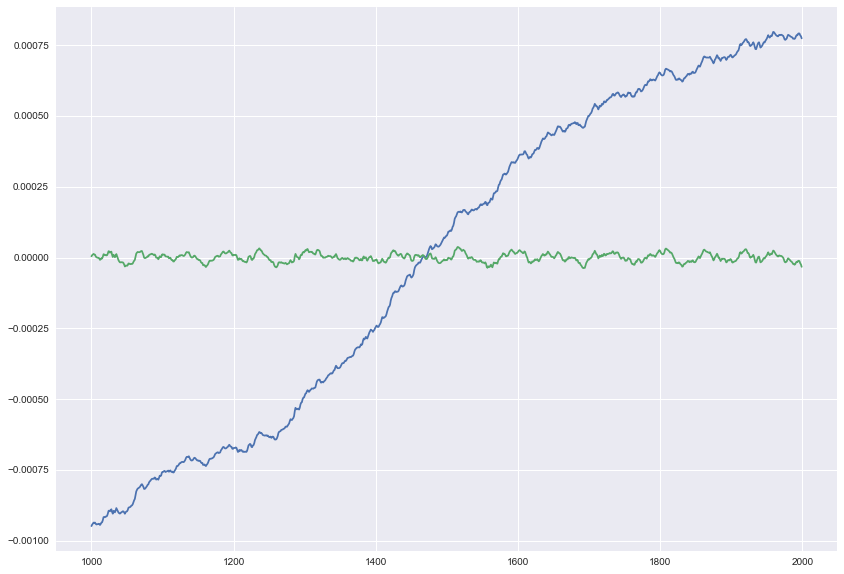

In [8]:
(df["Channel 1"][1000:2000]-df["Channel 1"][1000:2000].mean()).plot()
df["Channel 1 Filtered"][1000:2000].plot()

In [9]:
df["Channel 2 Filtered"] = filtfilt(b, a, df.iloc[:, 1])

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

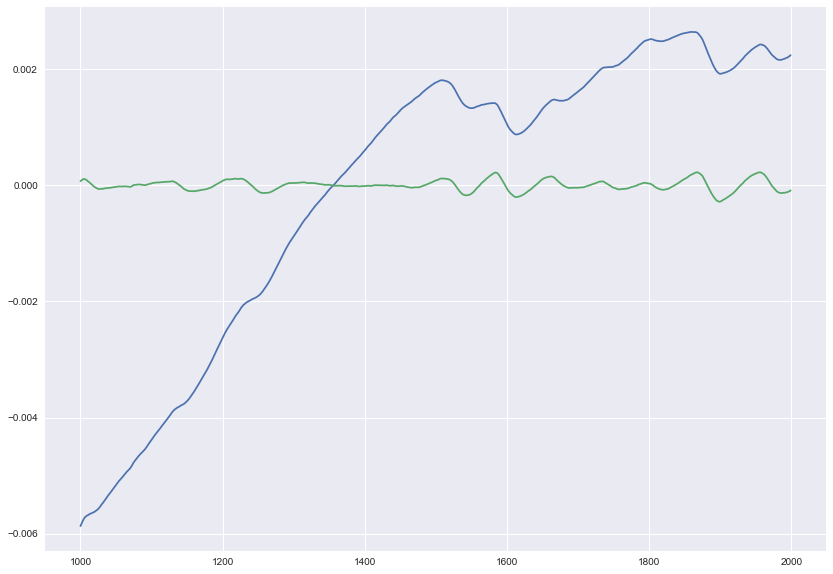

In [10]:
(df["Channel 2"][1000:2000]-df["Channel 2"][1000:2000].mean()).plot()
df["Channel 2 Filtered"][1000:2000].plot()

In [11]:
df["Delta"] = np.sqrt(df.iloc[:, 2]**2 + df.iloc[:, 3]**2)

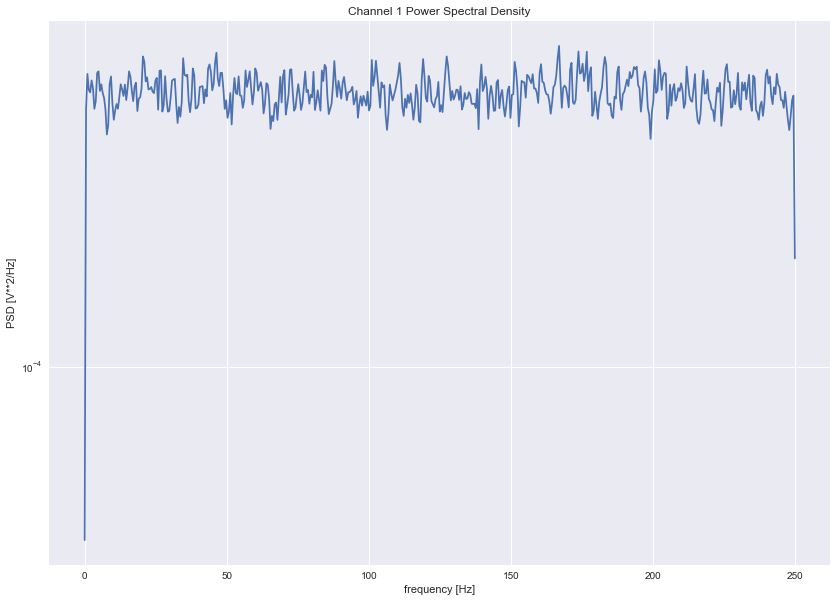

In [12]:
f1, Pxx_den1 = welch(np.random.random(100000), 500, nperseg=1024)

plt.semilogy(f1, Pxx_den1)
plt.title("Channel 1 Power Spectral Density")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

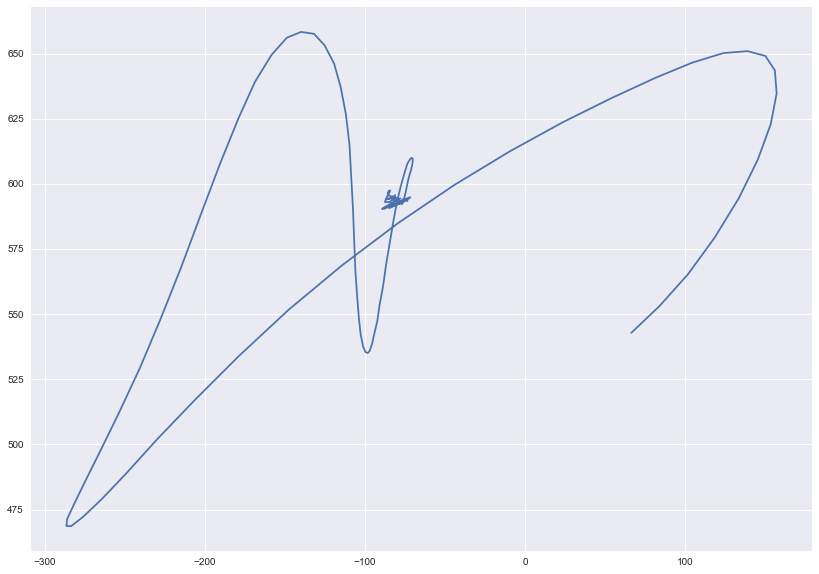

In [64]:
plot(df.iloc[:200, 2], df.iloc[:200, 3])

In [48]:
df.head()

,Channel 1,Channel 2,Accelerometer X,Accelerometer Y,STI 014,Channel 1 Filtered,Channel 2 Filtered,Delta
0,4.768372e-08,4.768372e-08,-77.859779,594.464945,5794.0,1.802522e-13,1.802503e-13,599.542088
1,4.768372e-08,4.768372e-08,-86.346863,591.512915,5794.0,-5.658205e-04,4.234319e-03,597.781992
2,4.768372e-08,4.768372e-08,-89.298893,590.405904,5794.0,-1.131254e-03,8.465505e-03,597.120946
3,4.768372e-08,4.768372e-08,-87.822878,590.405904,5794.0,-1.695914e-03,1.269043e-02,596.901993
4,1.918254e-02,-1.612196e-01,-83.025830,591.881919,5794.0,1.692774e-02,-1.443528e-01,597.676747


In [14]:
f1, Pxx_den1 = welch(df.iloc[:, 5], fs, nperseg=1024)

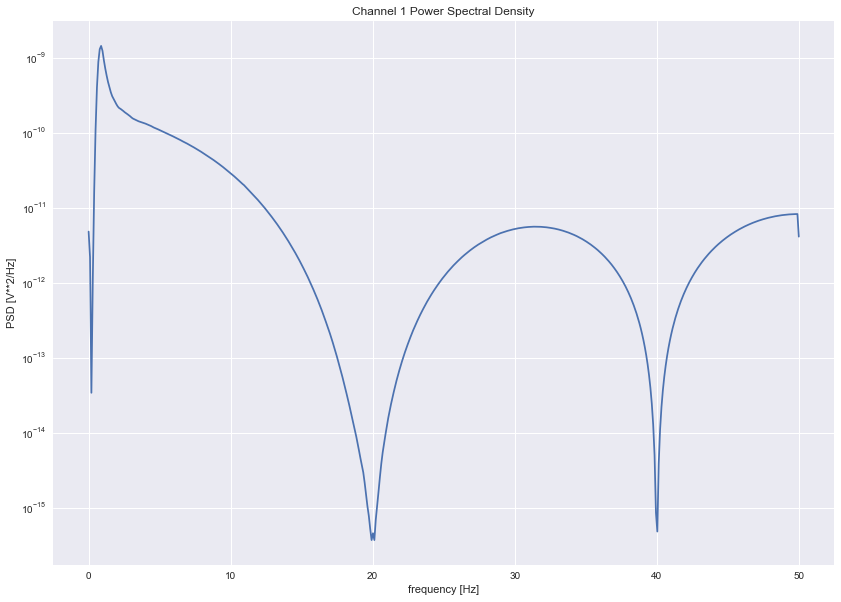

In [15]:
plt.semilogy(f1, Pxx_den1)
plt.title("Channel 1 Power Spectral Density")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [16]:
f2, Pxx_den2 = welch(df.iloc[:, 6], fs, nperseg=1024)

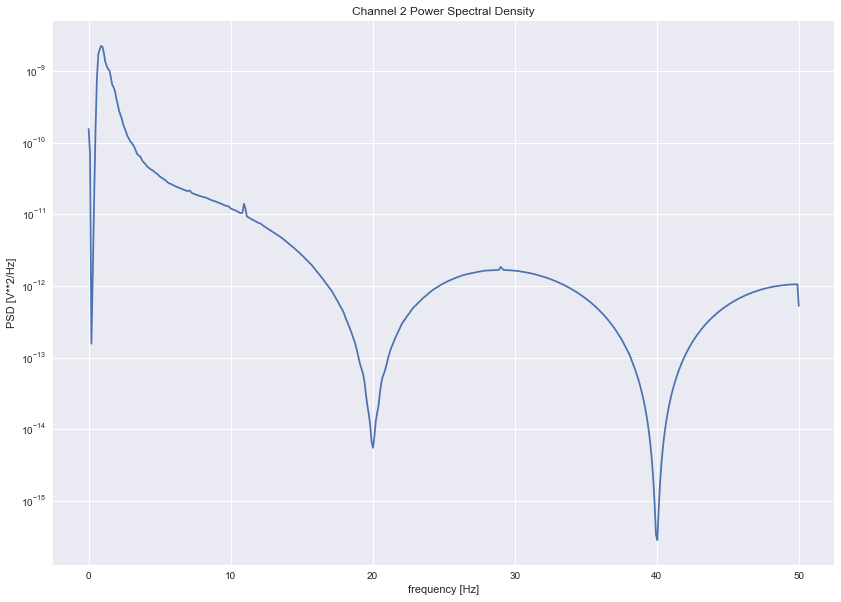

In [17]:
plt.semilogy(f2, Pxx_den2)
plt.title("Channel 2 Power Spectral Density")
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

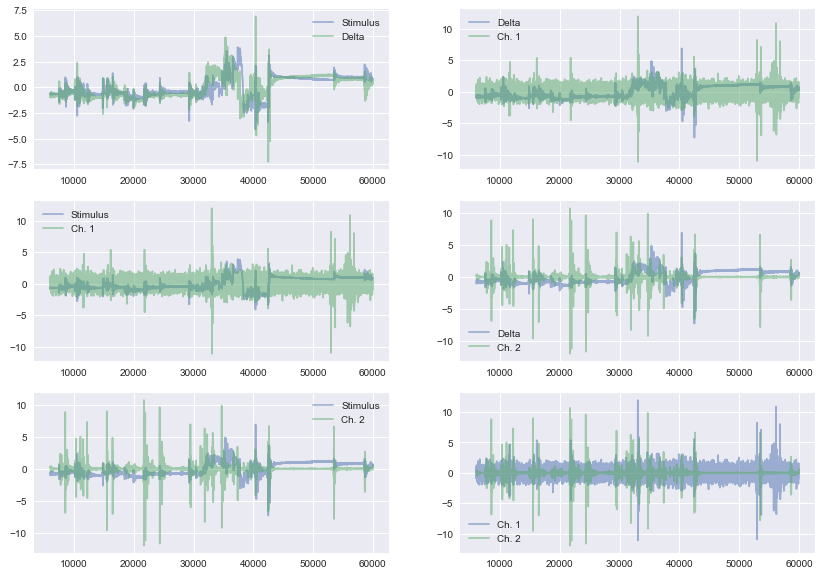

In [66]:
start = fs*60
end = fs*60*10

stim = (df.iloc[start:end, 4]-df.iloc[start:end, 4].mean())/df.iloc[start:end, 4].std()
delta = (df.iloc[start:end, 7]-df.iloc[start:end, 7].mean())/df.iloc[start:end, 7].std()
ch1 = (df.iloc[start:end, 5]-df.iloc[start:end, 5].mean())/df.iloc[start:end, 5].std()
ch2 = (df.iloc[start:end, 6]-df.iloc[start:end, 6].mean())/df.iloc[start:end, 6].std()

plt.subplot(3,2,1)
plt.plot(stim, label="Stimulus", alpha = 0.5)
plt.plot(delta, label="Delta", alpha = 0.5)
plt.legend()

plt.subplot(3,2,2)
plt.plot(delta, label="Delta", alpha = 0.5)
plt.plot(ch1, label="Ch. 1", alpha = 0.5)
plt.legend()

plt.subplot(3,2,3)
plt.plot(stim, label="Stimulus", alpha = 0.5)
plt.plot(ch1, label="Ch. 1", alpha = 0.5)
plt.legend()

plt.subplot(3,2,4)
plt.plot(delta, label="Delta", alpha = 0.5)
plt.plot(ch2, label="Ch. 2", alpha = 0.5)
plt.legend()


plt.subplot(3,2,5)
plt.plot(delta, label="Stimulus", alpha = 0.5)
plt.plot(ch2, label="Ch. 2", alpha = 0.5)
plt.legend()

plt.subplot(3,2,6)
plt.plot(ch1, label="Ch. 1", alpha = 0.5)
plt.plot(ch2, label="Ch. 2", alpha = 0.5)
plt.legend()

plt.show()

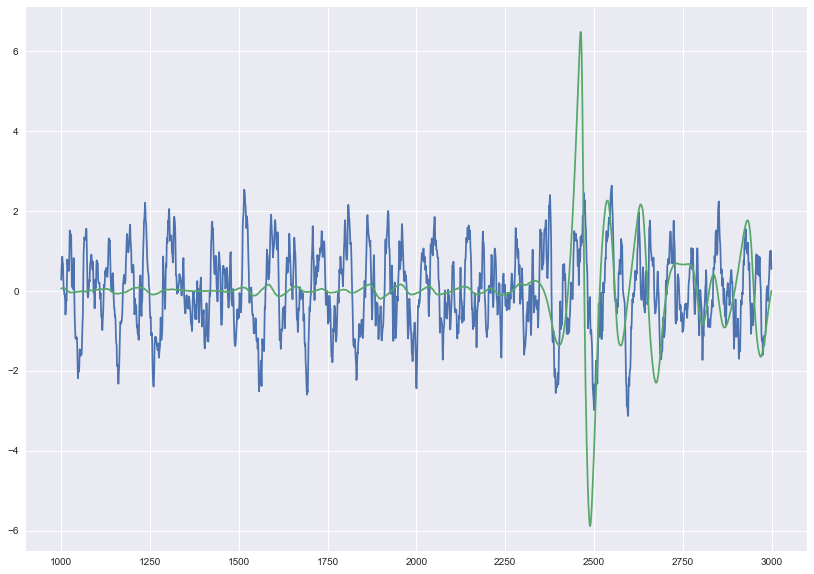

In [67]:
start = 1000
end = 3000
((df.iloc[start:end, 5]-df.iloc[start:end, 5].mean())/df.iloc[start:end, 5].std()).plot()
((df.iloc[start:end, 6]-df.iloc[start:end, 6].mean())/df.iloc[start:end, 6].std()).plot()

In [68]:
slice_len = fs*30
minuts = fs*60*1000
slices = np.arange(fs, minuts, slice_len)

av_stimuli = np.zeros([slices.shape[0]])
delta_s = np.zeros([slices.shape[0]])

for i in range(slices.shape[0]):
    av_stimuli[i] = (df.iloc[slices[i]:(slices[i]+slice_len), 4]).mean()
    delta_s[i] = df.iloc[slices[i]:(slices[i]+slice_len), 7].mean()

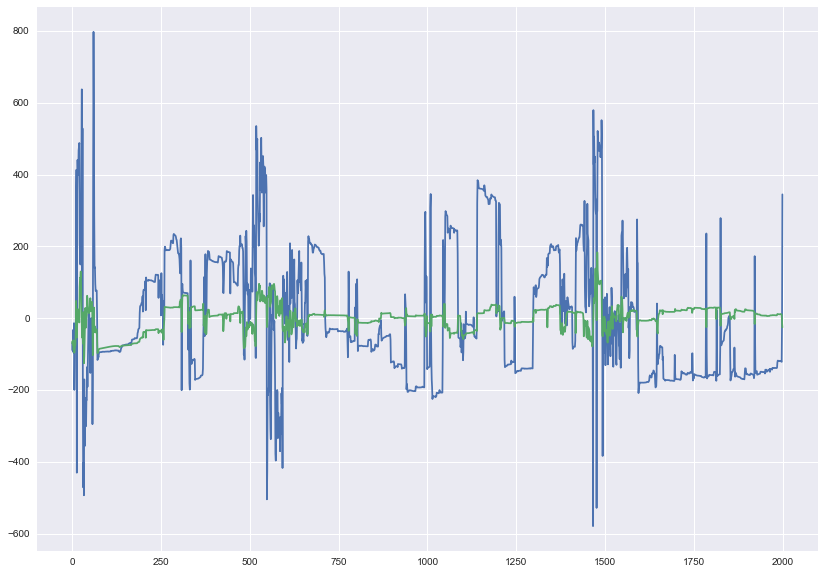

In [69]:
plt.plot((av_stimuli-av_stimuli.mean()))
plt.plot((delta_s-delta_s.mean()))

In [72]:
leng = fs*60*60*24*2

In [73]:
stim_rm = df.iloc[fs*60:leng, 4].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]
delta_rm = df.iloc[fs*60:leng, 7].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]
ch1_rm = df.iloc[fs*60:leng, 5].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]
ch2_rm = df.iloc[fs*60:leng, 6].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]

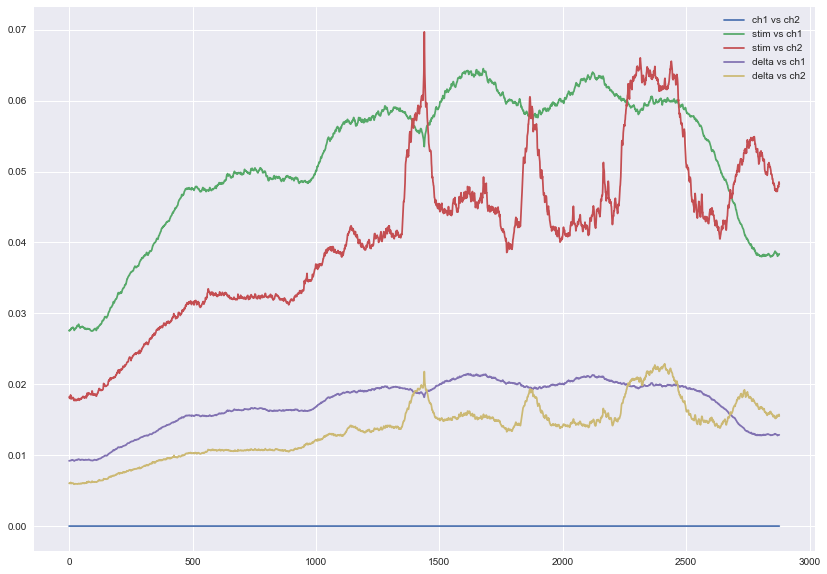

In [74]:
f = plt.plot

# f(np.correlate(stim_rm, delta_rm, mode="same"), label="stim vs delta")
f(np.correlate(ch1_rm, ch2_rm, mode="same"), label="ch1 vs ch2")
f(np.correlate(stim_rm, ch1_rm, mode="same"), label="stim vs ch1")
f(np.correlate(stim_rm, ch2_rm, mode="same"), label="stim vs ch2")
f(np.correlate(delta_rm, ch1_rm, mode="same"), label="delta vs ch1")
f(np.correlate(delta_rm, ch2_rm, mode="same"), label="delta vs ch2")
# plt.vlines(720, 0, 0.05)
plt.legend()
plt.show()

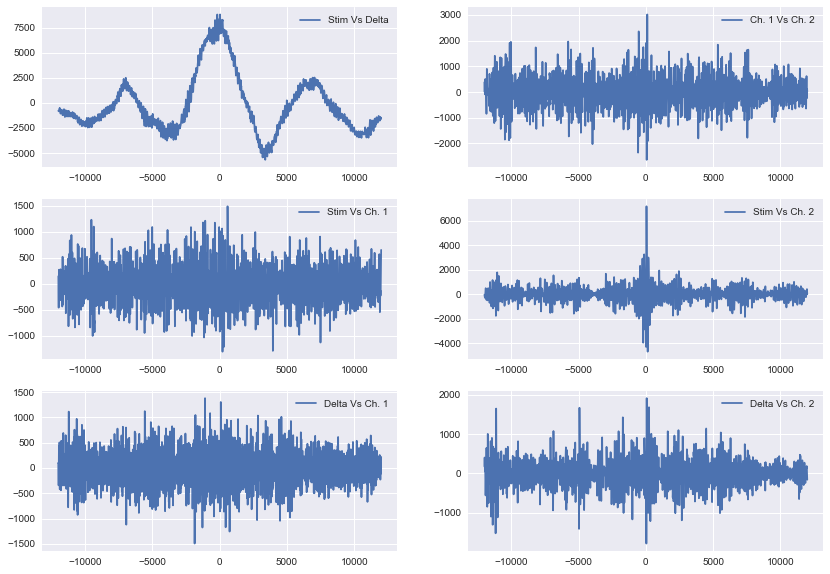

In [75]:
start = fs*60
end = fs*60*5

x = np.arange(-(end-start)/2, (end-start)/2, 1)

stim = (df.iloc[start:end, 4]-df.iloc[start:end, 4].mean())/df.iloc[start:end, 4].std()
delta = (df.iloc[start:end, 7]-df.iloc[start:end, 7].mean())/df.iloc[start:end, 7].std()
ch1 = (df.iloc[start:end, 5]-df.iloc[start:end, 5].mean())/df.iloc[start:end, 5].std()
ch2 = (df.iloc[start:end, 6]-df.iloc[start:end, 6].mean())/df.iloc[start:end, 6].std()

plt.subplot(3, 2, 1)
plt.plot(x, np.correlate(stim, delta, mode="same"), label="Stim Vs Delta")
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(x, np.correlate(ch1, ch2, mode="same"), label="Ch. 1 Vs Ch. 2")
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(x, np.correlate(stim, ch1, mode="same"), label="Stim Vs Ch. 1")
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(x, np.correlate(stim, ch2, mode="same"), label="Stim Vs Ch. 2")
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(x, np.correlate(delta, ch1, mode="same"), label="Delta Vs Ch. 1")
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(x, np.correlate(delta, ch2, mode="same"), label="Delta Vs Ch. 2")
plt.legend()

plt.show()

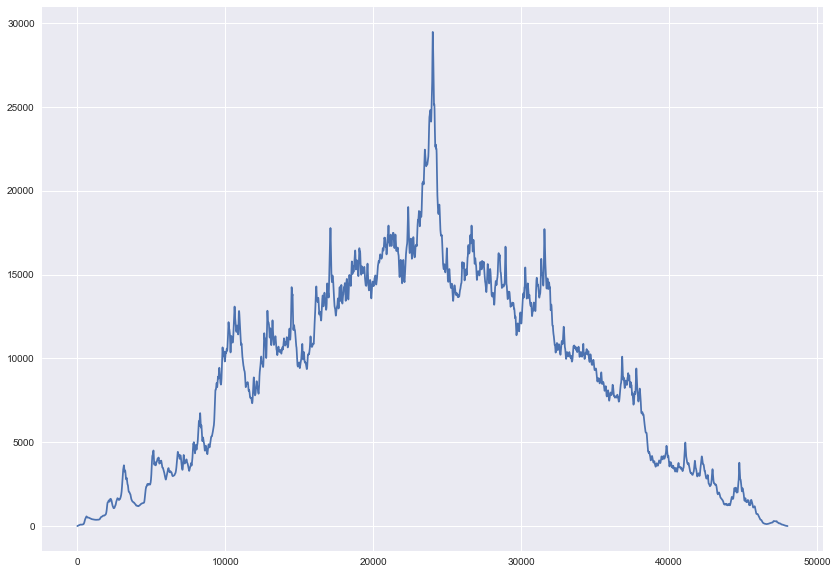

In [76]:
pearsonr(df.iloc[])

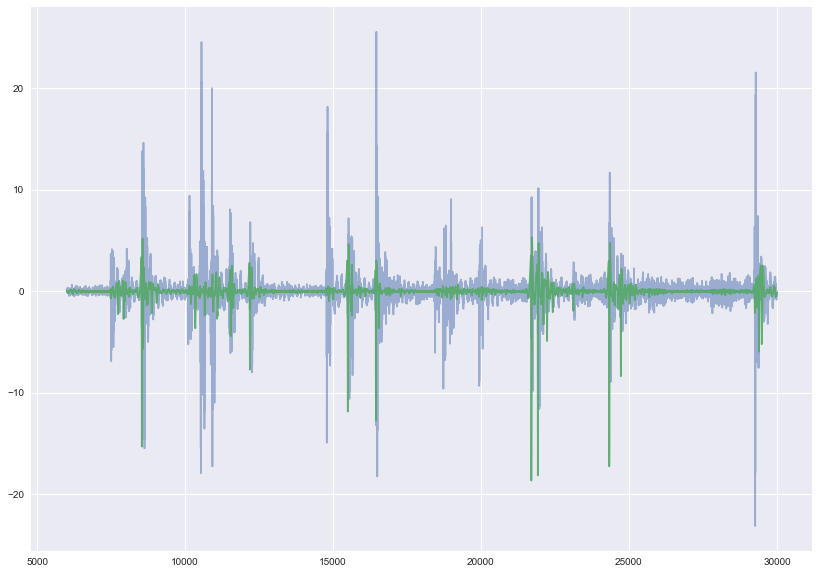

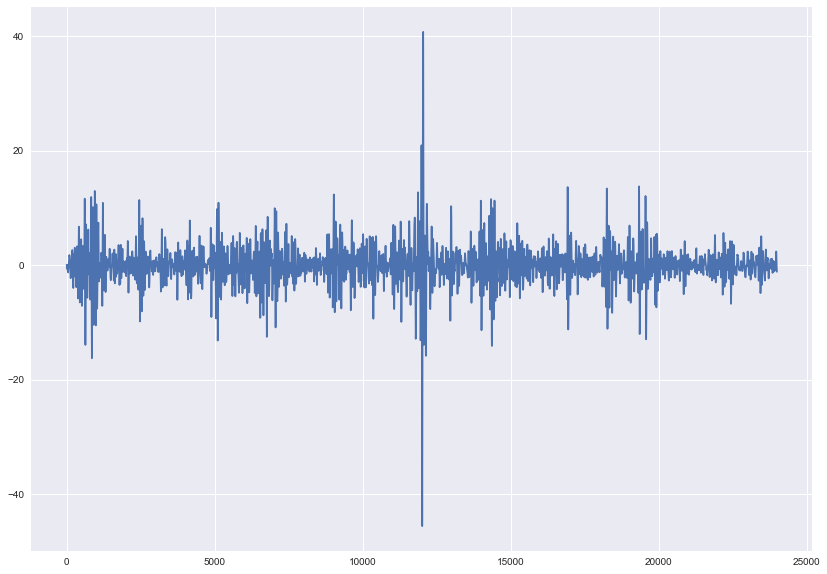

In [99]:
plot(np.correlate(d_stim-d_stim.mean()/d_stim.std(), d_ch2-d_ch2.mean()/d_ch2.std(), "same"))

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


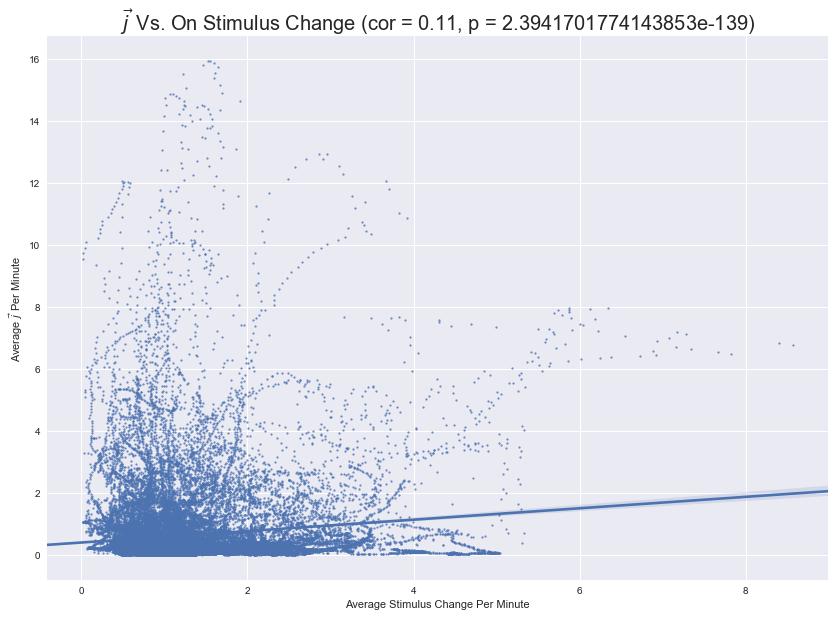

In [100]:
ans = pearsonr(np.abs(hilbert(stim)), y=np.abs(hilbert(ch2)))
sns.regplot(x=np.abs(hilbert(stim)), y=np.abs(hilbert(ch2)), marker=".", scatter_kws={"s": 20})
plt.title(r"$\vec j$ Vs. On Stimulus Change (cor = {}, p = {})".format(round(ans[0], 2), ans[1]), fontsize=20)
plt.ylabel(r"Average $\vecj$ Per Minute")
plt.xlabel(r"Average Stimulus Change Per Minute")
plt.show()

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


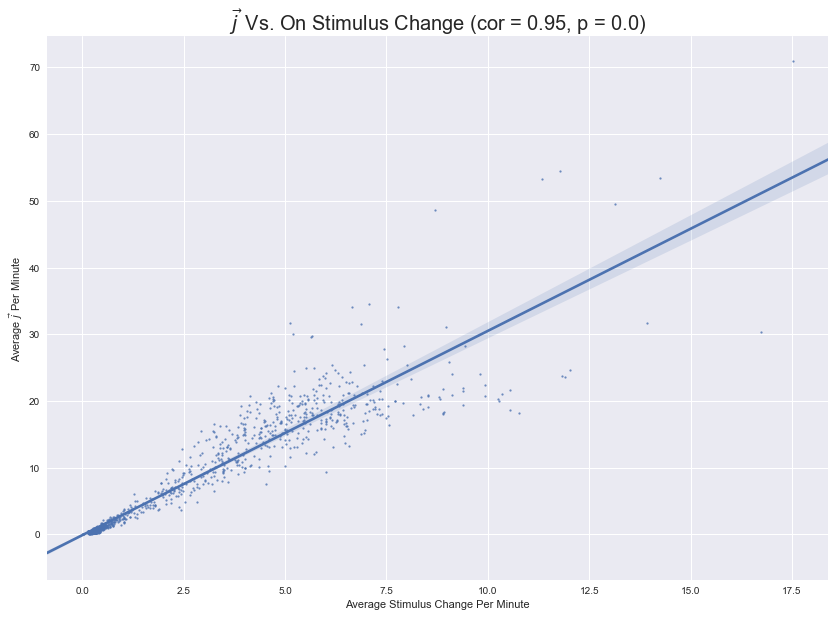

In [98]:
ans = pearsonr(stim_rm, delta_rm)
sns.regplot(x=delta_rm, y=stim_rm, marker=".", scatter_kws={"s": 20})
plt.title(r"$\vec j$ Vs. On Stimulus Change (cor = {}, p = {})".format(round(ans[0], 2), ans[1]), fontsize=20)
plt.ylabel(r"Average $\vecj$ Per Minute")
plt.xlabel(r"Average Stimulus Change Per Minute")
plt.show()

In [29]:
x1 = df.iloc[fs*60:leng, 0].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]
y1 = df.iloc[fs*60:leng, 1].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


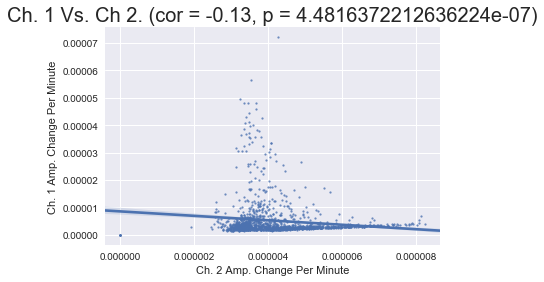

In [30]:
ans = pearsonr(x1, y1)
sns.regplot(x=x1, y=y1, marker=".", scatter_kws={"s": 20})
plt.title(r"Ch. 1 Vs. Ch 2. (cor = {}, p = {})".format(round(ans[0], 2), ans[1]), fontsize=20)
plt.ylabel(r"Ch. 1 Amp. Change Per Minute")
plt.xlabel(r"Ch. 2 Amp. Change Per Minute")
plt.show()

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


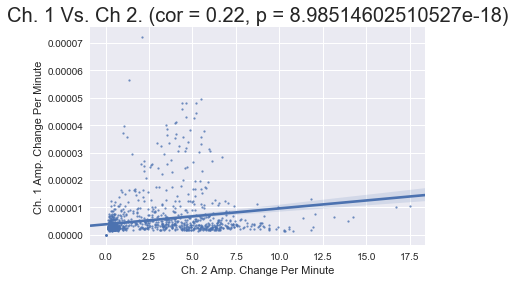

In [39]:
ans = pearsonr(y, y1)
sns.regplot(x=y, y=y1, marker=".", scatter_kws={"s": 20})
plt.title(r"Ch. 1 Vs. Ch 2. (cor = {}, p = {})".format(round(ans[0], 2), ans[1]), fontsize=20)
plt.ylabel(r"Ch. 1 Amp. Change Per Minute")
plt.xlabel(r"Ch. 2 Amp. Change Per Minute")
plt.show()

In [153]:
power1 = pd.Series(np.abs(hilbert(df.iloc[:leng, 5])))
power2 = pd.Series(np.abs(hilbert(df.iloc[:leng, 6])))

In [154]:
z1 = power1[fs*60:leng].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]
z2 = power2[fs*60:leng].diff().abs().rolling(fs*60).mean().dropna()[::fs*60]

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


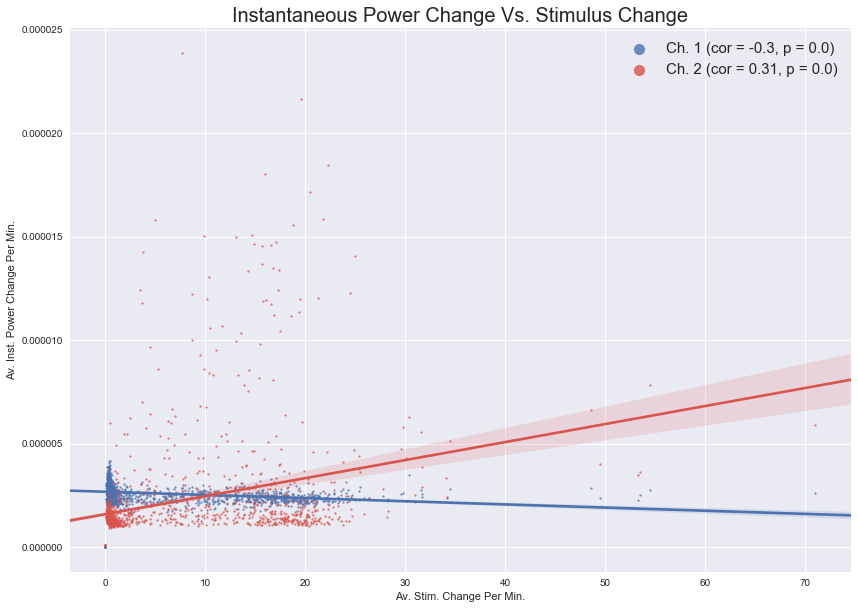

In [165]:
ans_ch1 = pearsonr(x, z1)
ans_ch2 = pearsonr(x, z2)

f, ax = plt.subplots(1, 1)

sns.regplot(x=x, 
            y=z1, 
            marker=".", 
            scatter_kws={"s": 20}, 
            label="Ch. 1 (cor = {}, p = {})".format(round(ans_ch1[0], 2), round(ans_ch1[1], 2))
           )

sns.regplot(x=x, 
            y=z2, 
            marker=".", 
            scatter_kws={"s": 20}, 
            color=sns.xkcd_rgb["pale red"], 
            label="Ch. 2 (cor = {}, p = {})".format(round(ans_ch2[0], 2), round(ans_ch2[1], 2))
           )

ax.legend(fontsize=15, markerscale=5)

plt.title("Instantaneous Power Change Vs. Stimulus Change", fontsize=20)
plt.ylabel(r"Av. Inst. Power Change Per Min.")
plt.xlabel(r"Av. Stim. Change Per Min.")
plt.show()

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


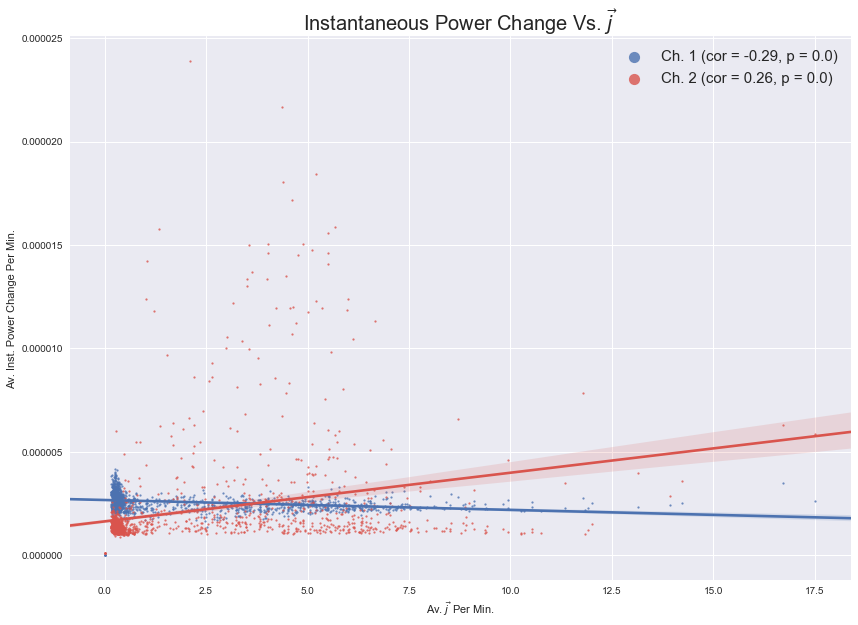

In [166]:
ans_ch1 = pearsonr(y, z1)
ans_ch2 = pearsonr(y, z2)

f, ax = plt.subplots(1, 1)

sns.regplot(x=y, 
            y=z1, 
            marker=".", 
            scatter_kws={"s": 20}, 
            label="Ch. 1 (cor = {}, p = {})".format(round(ans_ch1[0], 2), round(ans_ch1[1], 2))
           )

sns.regplot(x=y, 
            y=z2, 
            marker=".", 
            scatter_kws={"s": 20}, 
            color=sns.xkcd_rgb["pale red"], 
            label="Ch. 2 (cor = {}, p = {})".format(round(ans_ch2[0], 2), round(ans_ch2[1], 2))
           )

ax.legend(fontsize=15, markerscale=5)

plt.title(r"Instantaneous Power Change Vs. $\vec j$", fontsize=20)
plt.ylabel(r"Av. Inst. Power Change Per Min.")
plt.xlabel(r"Av. $\vec j$ Per Min.")
plt.show()

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


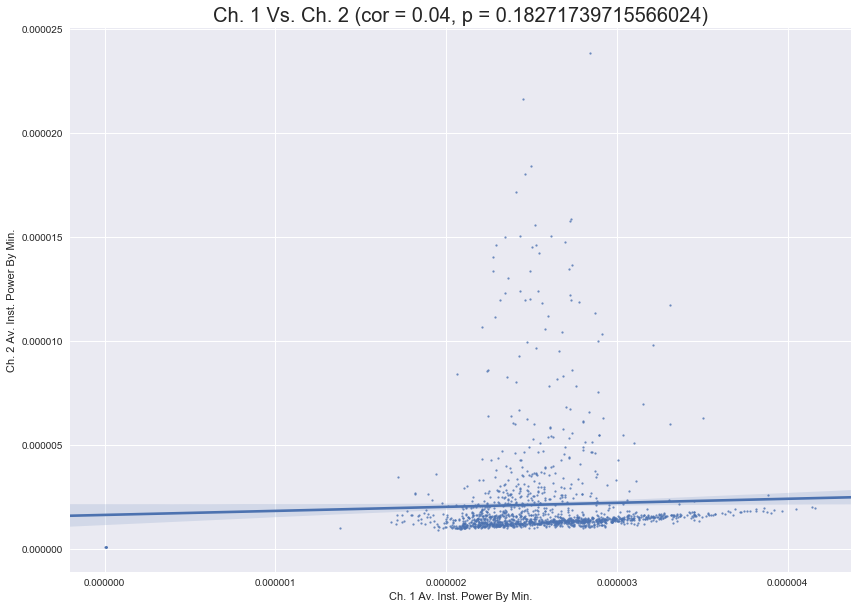

In [167]:
ans = pearsonr(z1, z2)
sns.regplot(x=z1, y=z2, marker=".", scatter_kws={"s": 20})
plt.title(r"Ch. 1 Vs. Ch. 2 (cor = {}, p = {})".format(round(ans[0], 2), ans[1]), fontsize=20)
plt.ylabel(r"Ch. 2 Av. Inst. Power By Min.")
plt.xlabel(r"Ch. 1 Av. Inst. Power By Min.")
plt.show()

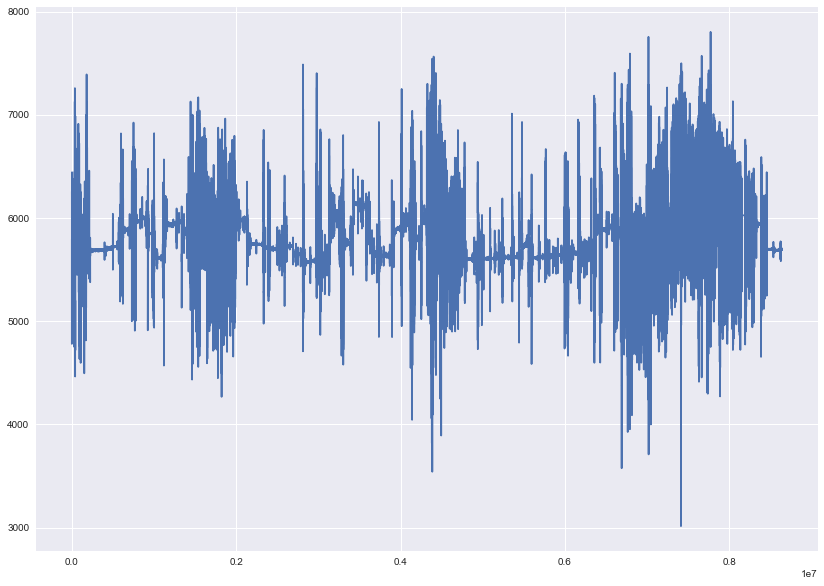

In [74]:
df.iloc[:leng, 4].plot()

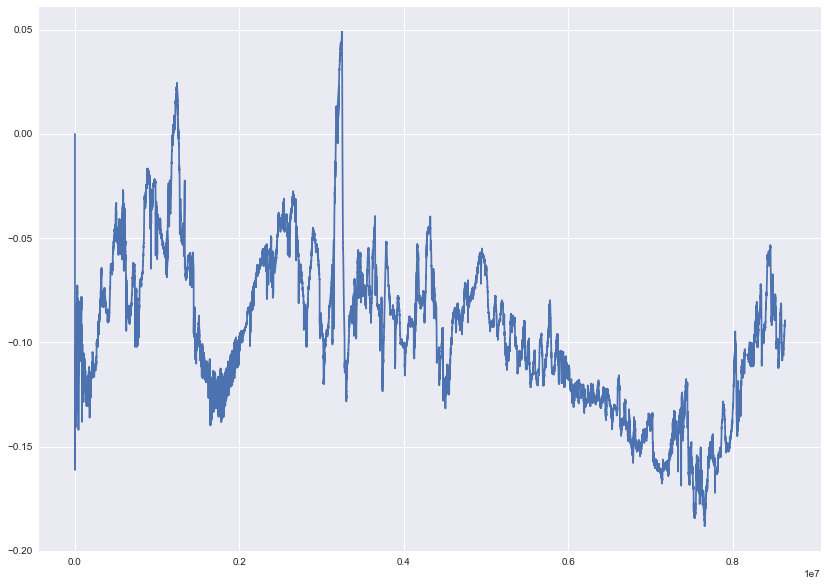

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

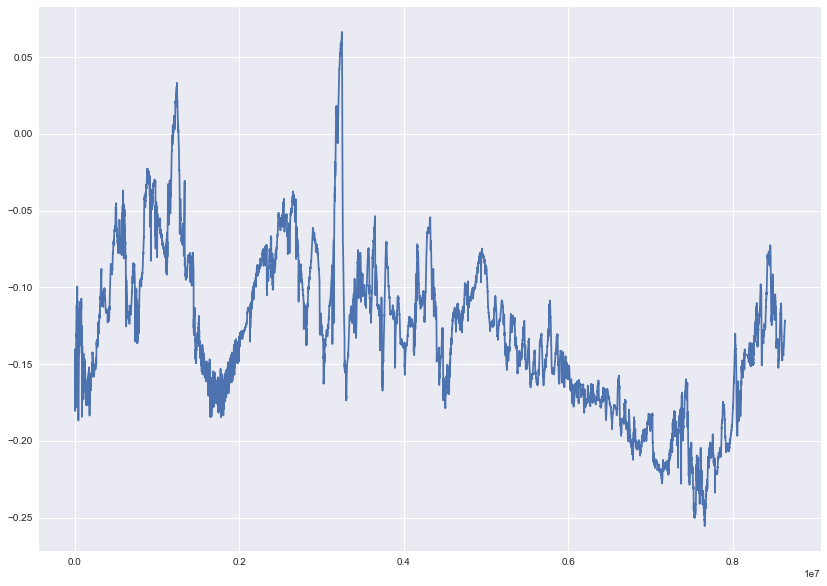

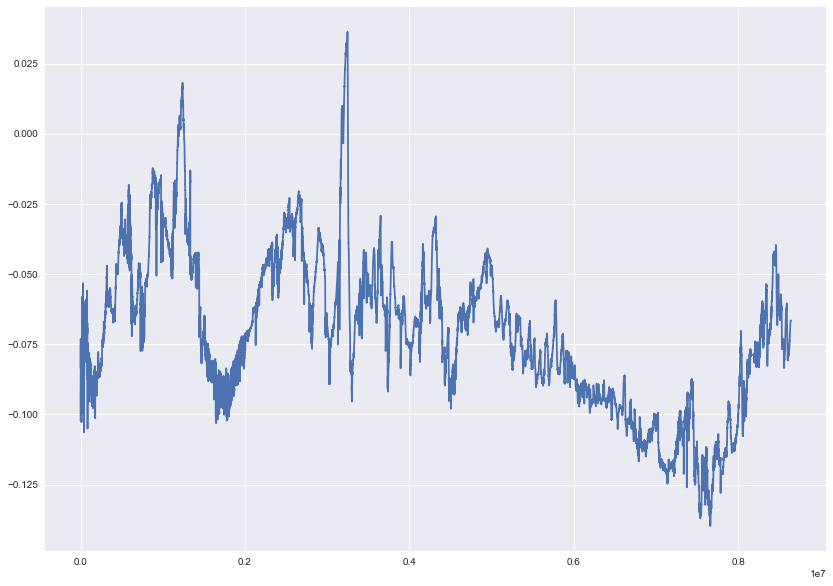

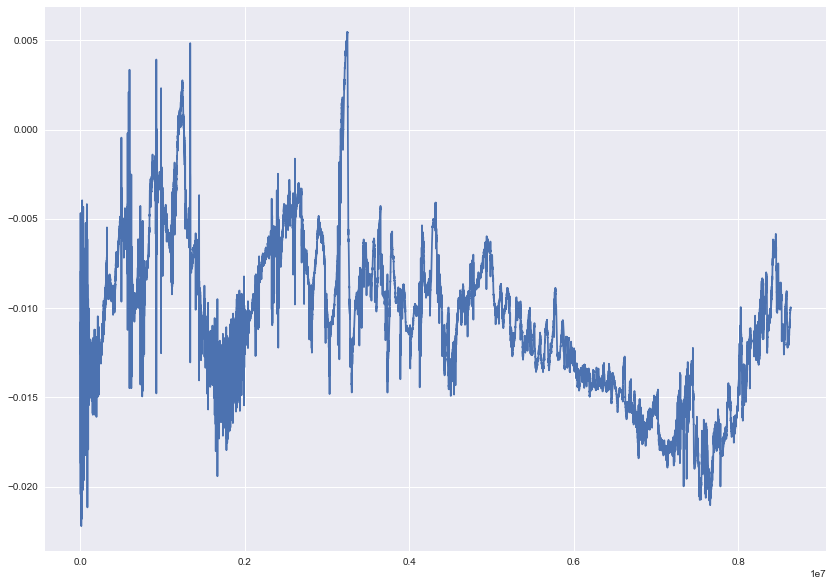

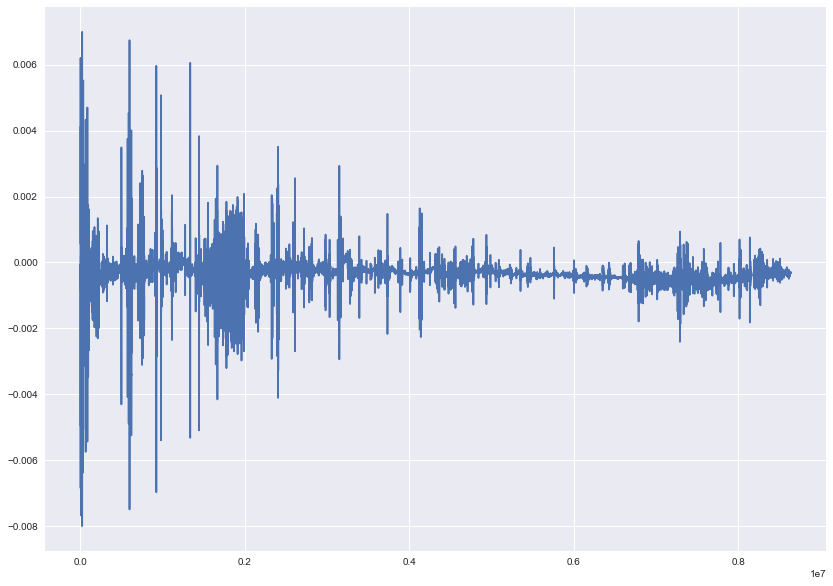

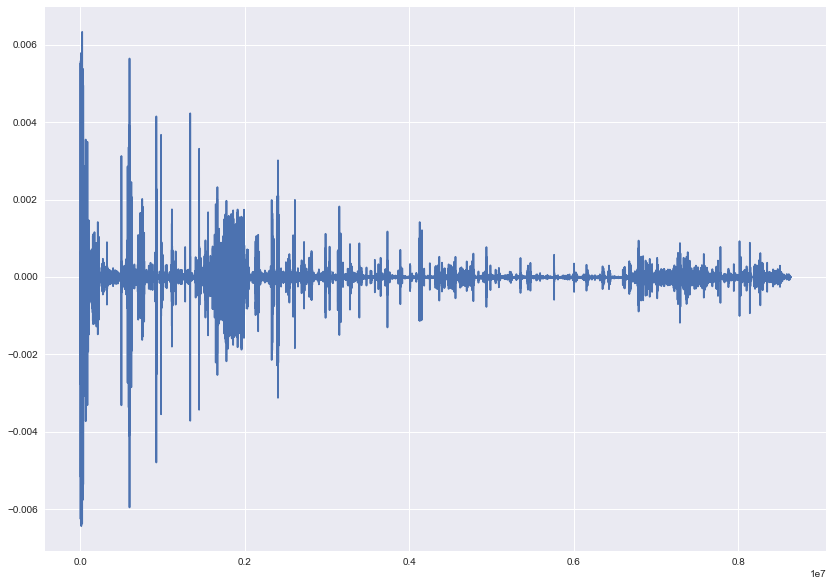

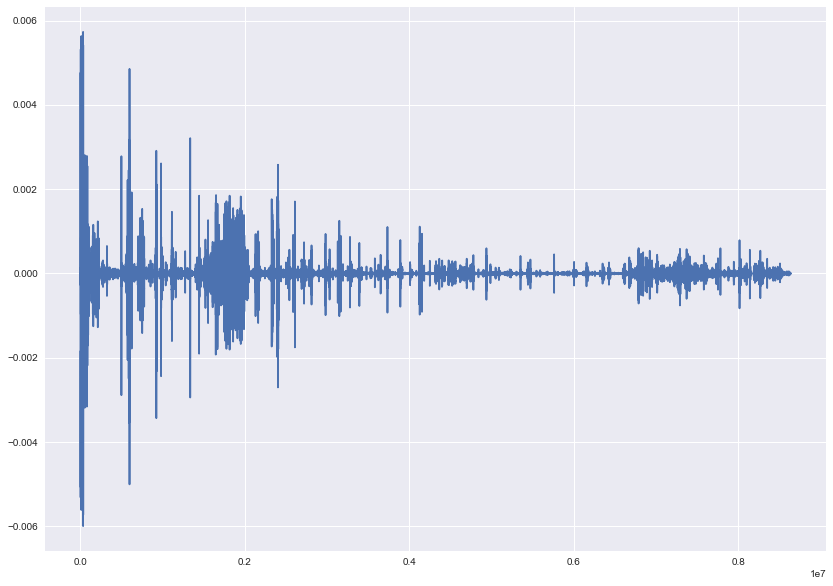

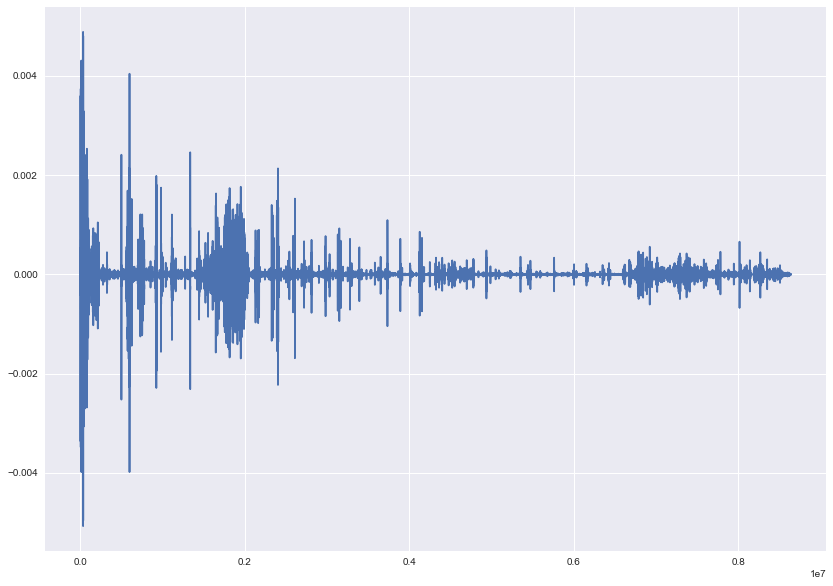

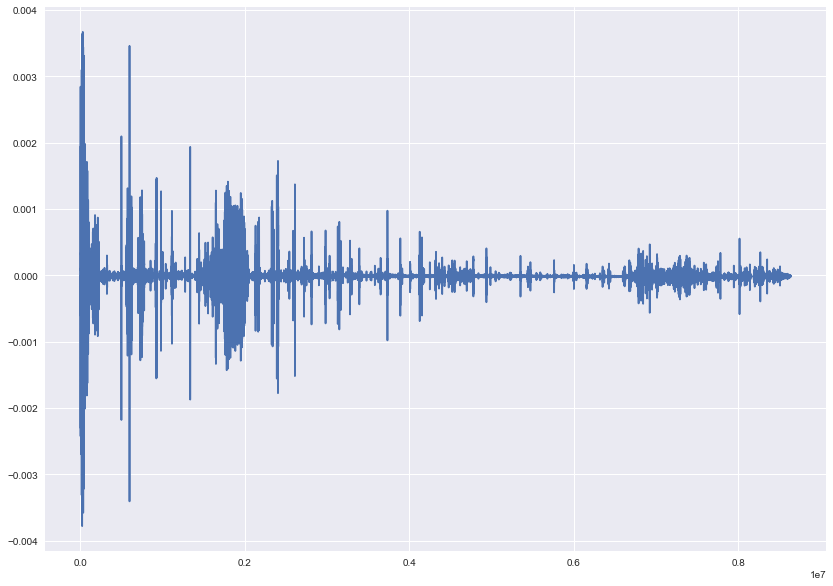

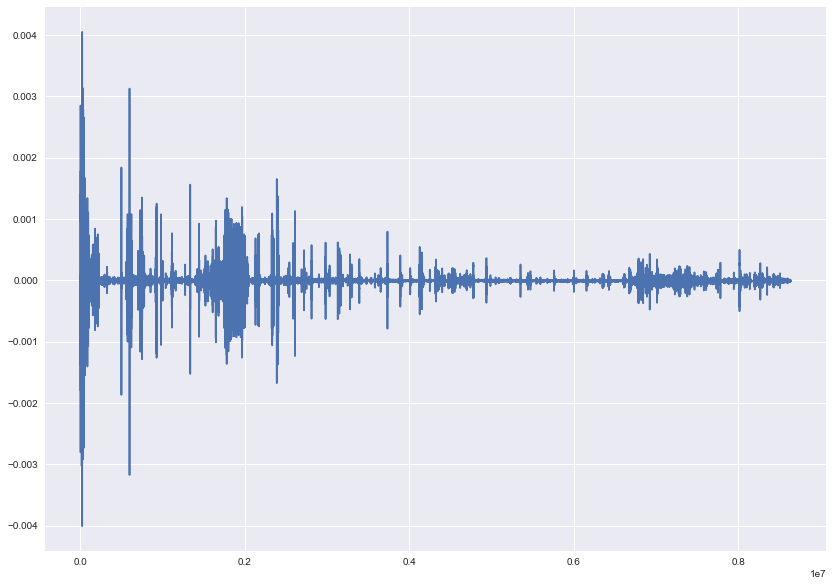

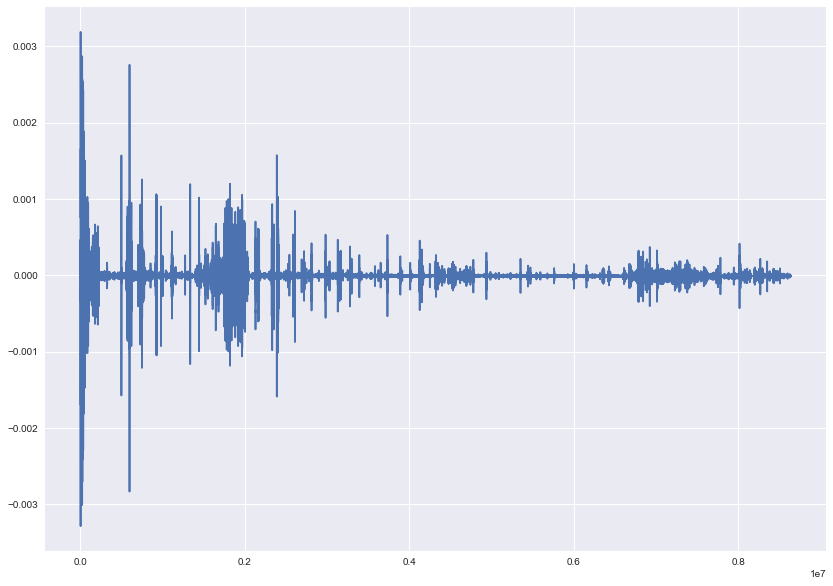

In [116]:
plt.plot(df.iloc[:leng, 1])
plt.show()

band = np.array([0.1, 0.2])
order = 400
fs = 100
a = 1

for _ in range(10):
    b = firwin(order+1, band * 2 / fs, width=None, window='hamming', pass_zero=False)  # design filter
    ans = filtfilt(b, a, df.iloc[1000:leng, 1])
    band += 0.1
    plt.plot(ans)
    plt.show()

In [76]:
band = np.array([0.4, 0.5])
order = 400
fs = 100
a = 1

b = firwin(order+1, band * 2 / fs, width=None, window='hamming', pass_zero=False)  # design filter
ans = filtfilt(b, a, df.iloc[:leng, 1])

/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/vasilyminkov/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futu

In [183]:
5e3

5000.0